# Solution - cummulative players

Plot the cummulative goals of every player in the afl statistics table.  The x-axis should be the number of games they have played and the y-axis should be their cummulative goal count at the end of that game.  Pick a player to highlight.

The data is not pre-sorted, so we need to join in the games table to get that information.

Note the need to reset the index.  If you don't the original index is maintained and you get everyone lined up by date since that index is a proxy for date (kind-of)

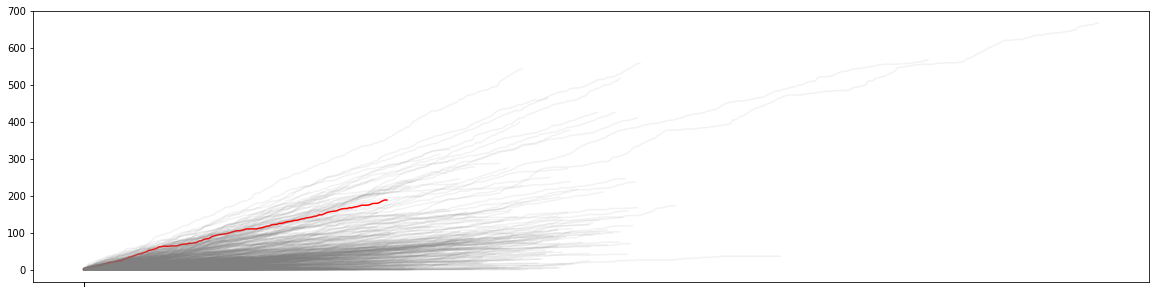

In [2]:
import pandas as pd

stats = pd.read_csv("data/afl/stats.csv")
games = pd.read_csv("data/afl/games.csv")
players = pd.read_csv("data/afl/players.csv")

full_stats = stats.merge(games, left_on="gameId", right_on="gameId")
full_stats["date"] = pd.to_datetime(full_stats["date"])
full_stats = full_stats.sort_values("date")
ax = pd.Series(dtype="float64").plot(figsize=(20,5))
for player in players["displayName"].drop_duplicates():
    if(player == "Papley, Tom"):
        color = "Red"
        alpha = 1.0
    else:
        color="Grey"
        alpha=0.1
    stats[stats["displayName"] == player]["Goals"].cumsum().reset_index(drop=True).plot(color=color, alpha=alpha, ax=ax)
    


# Exercise - medal summary

Generate a table (pivots will help) that summarises the medals for each person in each olympics.  I.e. the index should be the athlete name, the columns should be the individual olympics and the data should be:
  * "None" if they won no medals
  * "Silver, Gold" if they got one silver and one gold
  * etc.
NB: Order doesn't matter.

Note that in your solution, the treatment of `NaN` will be important.  Only get rid of them at the last minute because they get nicely ignored in the aggregation.

In [3]:
athletes = pd.read_excel("data/fun.xlsx", "athlete_events")

In [37]:
def combine(lst):
    return lst.str.cat(sep=",")

# athletes.info()
medal_summary = athletes.pivot_table(index="Name", columns="Games", values="Medal", aggfunc=combine)
medal_summary.fillna("None")

Games,1896 Summer,1900 Summer,1904 Summer,1906 Summer,1908 Summer,1912 Summer,1920 Summer,1924 Summer,1924 Winter,1928 Summer,...,1998 Winter,2000 Summer,2002 Winter,2004 Summer,2006 Winter,2008 Summer,2010 Winter,2012 Summer,2014 Winter,2016 Summer
Name,,,,,,,,,,,,,,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,
Eleonora Margarida Josephina Scmitt,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Jean Hauptmanns,None,None,None,None,None,,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Luis ngel Fernando de los Santos Grossi,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Th Anh,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Krdar emberci,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,,None,None
zlem Kaya,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,,None,
zman Graud,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


we can also summarise their whole careers with apply.  Doing so shows up some empty strings in the medal column we might like to remove.  I wonder where they are?

In [39]:
medal_summary.apply(combine, axis=1).drop_duplicates()

Name
  Gabrielle Marie "Gabby" Adcock (White-)                                                     
 Luis ngel Fernando de los Santos Grossi                                                     ,
A. Albert                                                                                 Gold
A. Dubois                                                                        Bronze,Silver
A. Joshua "Josh" West                                                                  ,Silver
                                                                   ...                        
Zou Kai                                                        Gold,Gold,Gold,Gold,Gold,Bronze
Zsolt Gyulay                                                          Gold,Gold,Silver,Silver,
dne Sndrl                                                                  Silver,,Gold,Bronze
gnes Keleti-Srkny (Klein)                    Silver,Bronze,Gold,Bronze,Silver,Silver,Gold,G...
va Grard-Novk                                

# Solution - Fantasy Football

Imagine you are setting up your own fantasy football league for AFL.  You decide each "disposal" is worth 1 point, each "Goal" is worth 2 points, and each "clanger" is worth -5 points.  "Ruck"s get 10 bonus points because it is a hard job and "Forwards" start with -10 points because they camp in front of goals all game.  Generate a table that gives each player their score by your measure for each game they played in (i.e. calculate points for each row of the `stats` table).  Sort the table by points so we can see the best players.

In [57]:
afl = stats.merge(players, left_on="playerId", right_on="playerId").merge(games, left_on="gameId", right_on="gameId")

def position_to_score(pos):
    if ("Ruck" in pos):
        return 10
    elif ("Forward" in pos):
        return -10
    else:
        return 0

afl["score"] = afl["Disposals"] + (afl["Goals"]*2) + (afl["Clangers"]*-5) + (afl["position"].apply(position_to_score))
soln = afl[["displayName_x", "year_x", "round_x", "score"]].sort_values("score", ascending=False)
soln


,displayName_x,year_x,round_x,score
57481,"Macrae, Jack",2014,R17,47
36804,"Rosa, Matt",2012,R9,45
64613,"Treloar, Adam",2018,R6,44
2602,"Brayshaw, Angus",2018,R10,43
2811,"Laird, Rory",2018,R17,43
...,...,...,...,...
49457,"Dangerfield, Patrick",2018,EF,-45
8484,"Douglas, Richard",2018,R13,-47
3524,"Fyfe, Nat",2017,R10,-48
15616,"Ah Chee, Callum",2018,R9,-49


I'm also interested to know how well this differentiates players.

<AxesSubplot:ylabel='Frequency'>

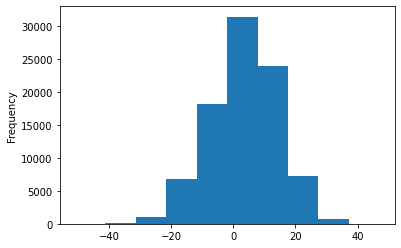

In [59]:
soln["score"].plot(kind="hist")

It's not too bad given how unsophisticated it is. That looks quite a bit like a normal distrubution to me!  I really like that it is (almost) centered around 0 - that was the plan.

Next question (left to readers), how often to teams get a negative score and still win the game?